# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Bono, Giorgio (343572);
2. Camolese, Claudio (344788).

In [580]:
StudentID1 = 343572# <-------- Fill in the missing value
StudentID2 = 344788  # <-------- Fill in the missing value

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [581]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Movies
Music
*************************************
*** THESE ARE THE SELECTED FEATURES:
Internet usage
Giving
Prioritising workload
Parents' advice
Thinking ahead
Children
Workaholism
Punctuality
Energy levels
Changing the past
Happiness in life
Decision making
Charity
Reliability
Personality
Cheating in school
Appearence and gestures
Health
New environment
Getting up
Interests or hobbies
Life struggles
Assertiveness
Empathy
Achievements
Friends versus money
Compassion to animals
Lying
Keeping promises
Writing notes
Final judgement
Small - big dogs
Hypochondria
Self-criticism
Waiting
Dreams
Unpopularity
Funniness
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [582]:
# DO NOT IMPORT NUMPY
%matplotlib widget

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml #loading dictionary
from IPython.display import display  # to display variables in a "nice" way

try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

# pd.options.display.max_rows = 9999
pd.options.display.max_columns = 20

## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [583]:
response_df= pd.read_csv("datasets/responses_hw.csv")
X_df= response_df[these_features]
X_df

,Internet usage,Giving,Prioritising workload,Parents' advice,Thinking ahead,Children,Workaholism,Punctuality,Energy levels,Changing the past,...,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,few hours a day,4.0,2.0,4.0,2.0,5.0,4.0,on time,5.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,few hours a day,2.0,2.0,2.0,4.0,2.0,5.0,early,3.0,4.0,...,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,few hours a day,5.0,2.0,3.0,5.0,4.0,3.0,late,4.0,5.0,...,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,most of the day,1.0,4.0,2.0,3.0,2.0,5.0,early,2.0,5.0,...,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,few hours a day,3.0,1.0,3.0,5.0,5.0,3.0,on time,5.0,4.0,...,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,few hours a day,3.0,2.0,4.0,2.0,3.0,4.0,late,3.0,1.0,...,3.0,2.0,4.0,1.0,5.0,4.0,4.0,3.0,3.0,2.0
1006,less than an hour a day,4.0,3.0,4.0,5.0,5.0,5.0,early,4.0,4.0,...,1.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0,4.0,1.0
1007,most of the day,1.0,1.0,4.0,4.0,3.0,1.0,late,1.0,5.0,...,1.0,2.0,3.0,3.0,2.0,2.0,5.0,1.0,1.0,1.0
1008,most of the day,3.0,1.0,3.0,3.0,3.0,1.0,late,2.0,3.0,...,1.0,1.0,2.0,2.0,3.0,2.0,5.0,2.0,2.0,1.0


In [584]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Internet usage            1010 non-null   object 
 1   Giving                    1004 non-null   float64
 2   Prioritising workload     1005 non-null   float64
 3   Parents' advice           1008 non-null   float64
 4   Thinking ahead            1007 non-null   float64
 5   Children                  1006 non-null   float64
 6   Workaholism               1005 non-null   float64
 7   Punctuality               1008 non-null   object 
 8   Energy levels             1005 non-null   float64
 9   Changing the past         1008 non-null   float64
 10  Happiness in life         1006 non-null   float64
 11  Decision making           1006 non-null   float64
 12  Charity                   1007 non-null   float64
 13  Reliability               1006 non-null   float64
 14  Personal

In [585]:
X_df=X_df.sample(frac=2/3, random_state=42)
X_df

,Internet usage,Giving,Prioritising workload,Parents' advice,Thinking ahead,Children,Workaholism,Punctuality,Energy levels,Changing the past,...,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
629,few hours a day,5.0,1.0,4.0,2.0,5.0,2.0,late,2.0,1.0,...,1.0,1.0,5.0,3.0,2.0,2.0,2.0,5.0,3.0,2.0
788,less than an hour a day,5.0,3.0,3.0,2.0,5.0,2.0,on time,5.0,3.0,...,2.0,3.0,4.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0
684,few hours a day,4.0,4.0,3.0,4.0,4.0,2.0,early,4.0,1.0,...,1.0,2.0,4.0,2.0,2.0,3.0,2.0,4.0,1.0,1.0
516,few hours a day,5.0,5.0,5.0,5.0,5.0,4.0,on time,4.0,1.0,...,4.0,3.0,5.0,3.0,2.0,3.0,3.0,2.0,4.0,3.0
529,few hours a day,2.0,3.0,3.0,5.0,3.0,2.0,late,2.0,4.0,...,3.0,2.0,1.0,1.0,2.0,3.0,4.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,few hours a day,2.0,3.0,3.0,3.0,4.0,2.0,on time,5.0,2.0,...,2.0,1.0,4.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0
762,less than an hour a day,3.0,5.0,4.0,4.0,4.0,5.0,on time,5.0,1.0,...,1.0,3.0,4.0,5.0,1.0,3.0,5.0,1.0,3.0,1.0
111,most of the day,2.0,1.0,3.0,2.0,2.0,2.0,late,2.0,5.0,...,2.0,2.0,3.0,3.0,4.0,4.0,5.0,2.0,4.0,4.0
226,few hours a day,5.0,4.0,4.0,5.0,5.0,3.0,late,3.0,5.0,...,3.0,3.0,5.0,3.0,2.0,NaN,1.0,NaN,3.0,1.0


In [586]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 673 entries, 629 to 694
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Internet usage            673 non-null    object 
 1   Giving                    670 non-null    float64
 2   Prioritising workload     669 non-null    float64
 3   Parents' advice           672 non-null    float64
 4   Thinking ahead            672 non-null    float64
 5   Children                  670 non-null    float64
 6   Workaholism               670 non-null    float64
 7   Punctuality               672 non-null    object 
 8   Energy levels             668 non-null    float64
 9   Changing the past         672 non-null    float64
 10  Happiness in life         670 non-null    float64
 11  Decision making           672 non-null    float64
 12  Charity                   671 non-null    float64
 13  Reliability               670 non-null    float64
 14  Personality  

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [587]:
X_df.isna().sum().sum()

np.int64(194)

In [588]:
X_df.dropna(axis=0, inplace=True)


Smoking= {"never smoked":1, "tried smoking":2, "former smoker":3, "current smoker":4}
Alcohol= {"never":1, "social drinker":2, "drink a lot":3}
Punctuality= {"late":1, "on time":2, "early":3}
Lying= {"never":1,"only to avoid hurting someone":2, "sometimes":3, "everytime it suits me":4}
Internet_Usage= {"no time at all":1,"less than an hour a day":2, "few hours a day":3, "most of the day":4}

X_df["Smoking"] = np.array([Smoking[val] for val in X_df["Smoking"].values])
X_df["Alcohol"] = np.array([Alcohol[val] for val in X_df["Alcohol"].values])
X_df["Punctuality"] = np.array([Punctuality[val] for val in X_df["Punctuality"].values])
X_df["Lying"] = np.array([Lying[val] for val in X_df["Lying"].values])
X_df["Internet usage"] = np.array([Internet_Usage[val] for val in X_df["Internet usage"].values])

In [589]:
std=StandardScaler()
Xstd_df=pd.DataFrame(std.fit_transform(X_df), columns=X_df.columns)
mm=MinMaxScaler()
Xmm_df=pd.DataFrame(mm.fit_transform(X_df), columns=X_df.columns)

In [590]:
X_df.var(), Xstd_df.var(), Xmm_df.var()

(Internet usage           0.255107
 Giving                   1.726862
 Prioritising workload    1.536380
 Parents' advice          0.723543
 Thinking ahead           1.266473
                            ...   
 Rock n roll              1.483291
 Alternative              1.784829
 Latino                   1.799872
 Techno, Trance           1.735011
 Opera                    1.360780
 Length: 82, dtype: float64,
 Internet usage           1.001838
 Giving                   1.001838
 Prioritising workload    1.001838
 Parents' advice          1.001838
 Thinking ahead           1.001838
                            ...   
 Rock n roll              1.001838
 Alternative              1.001838
 Latino                   1.001838
 Techno, Trance           1.001838
 Opera                    1.001838
 Length: 82, dtype: float64,
 Internet usage           0.028345
 Giving                   0.107929
 Prioritising workload    0.096024
 Parents' advice          0.045221
 Thinking ahead           0.0791

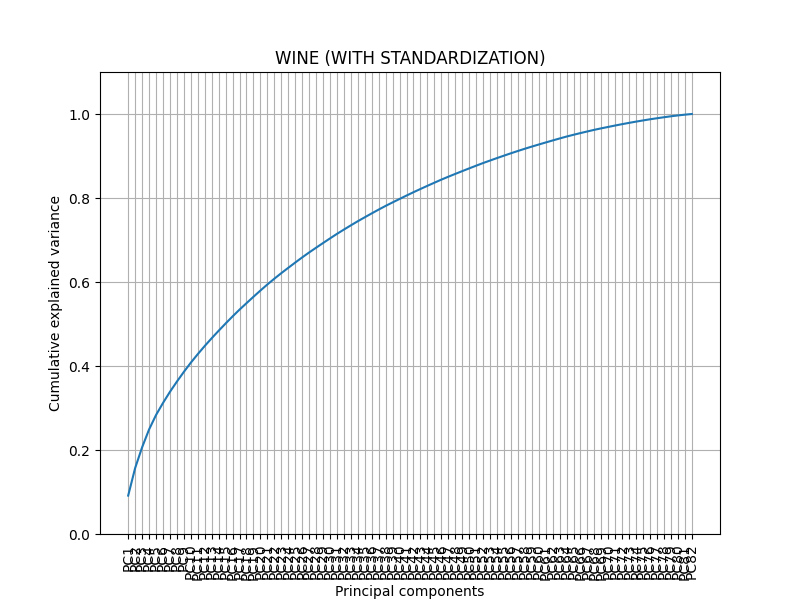

In [591]:
pca= PCA()
pca.fit(X_df.values)

round_expl_var_ratio = np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)  # <-- TODO!!

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('WINE (WITH STANDARDIZATION)')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca.n_features_in_), 
           labels=[f'PC{i + 1}' for i in range(pca.n_features_in_)],
           rotation=90)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.ylim()
plt.grid()
plt.show()

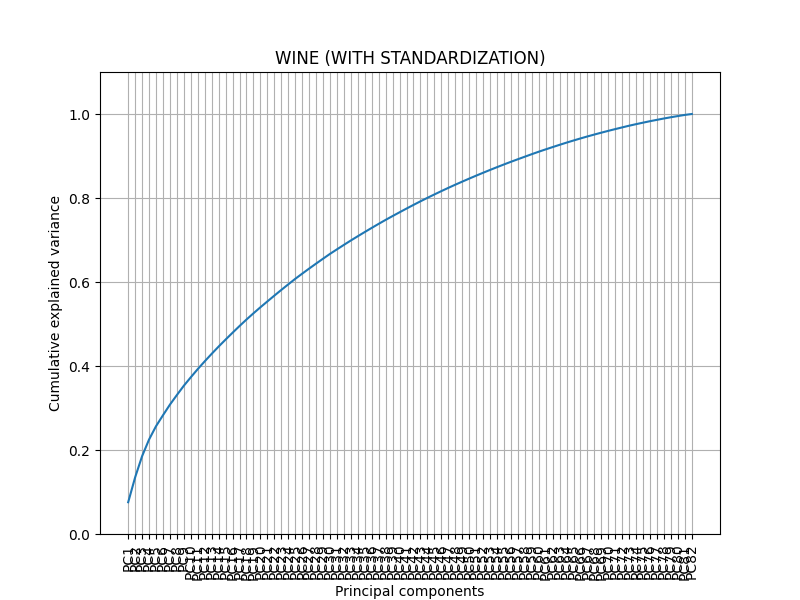

7


In [592]:
pca= PCA()
pca.fit(Xstd_df.values)

round_expl_var_ratio = np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)  # <-- TODO!!

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('WINE (WITH STANDARDIZATION)')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca.n_features_in_), 
           labels=[f'PC{i + 1}' for i in range(pca.n_features_in_)],
           rotation=90)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

threshold = 0.33
num_components_std = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold)+1
print(num_components)

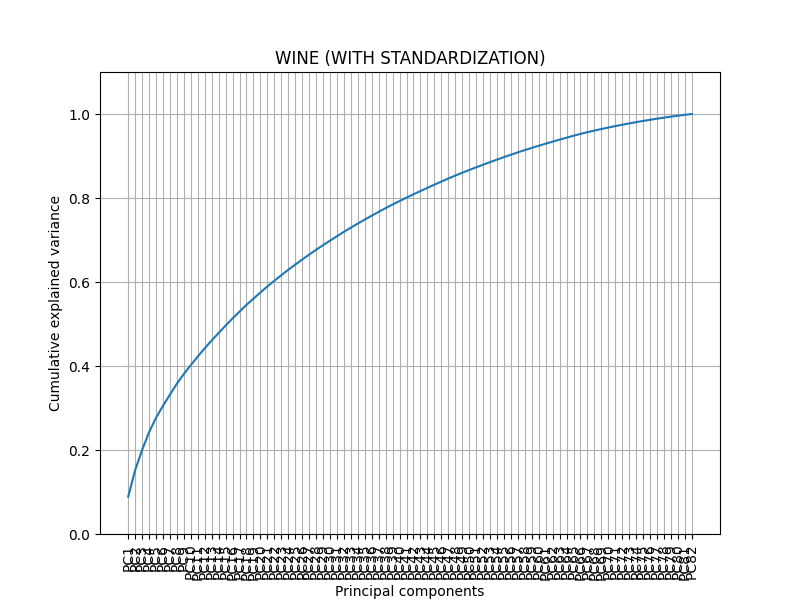

In [593]:
pca= PCA()
pca.fit(Xmm_df.values)

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('WINE (WITH STANDARDIZATION)')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca.n_features_in_), 
           labels=[f'PC{i + 1}' for i in range(pca.n_features_in_)],
           rotation=90)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()
num_components_mm= np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold)+1

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

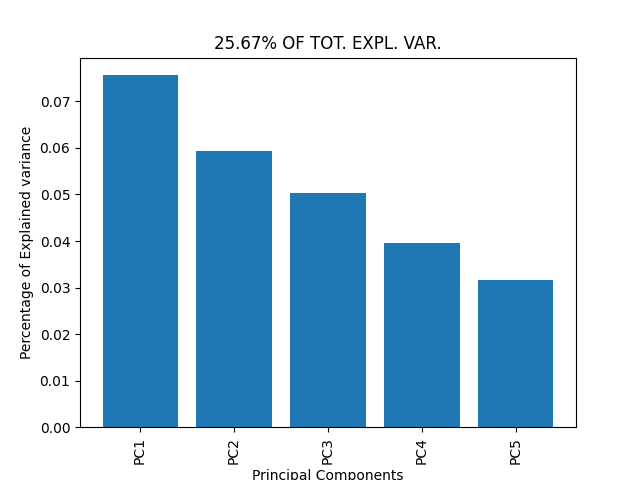

In [594]:
m= min(5,num_components_std)
pca = PCA(n_components=m)
pca.fit(Xstd_df)  
round_expl_var_ratio = np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)

plt.figure()
plt.bar(range(1,m+1), pca.explained_variance_ratio_)
plt.title(f"{round_expl_var_ratio}% OF TOT. EXPL. VAR.")
plt.xticks(ticks=np.arange(1,m+1), 
           labels=[f"PC{i}" for i in range(1,m+1)],
           rotation=90)
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Explained variance")
plt.show()

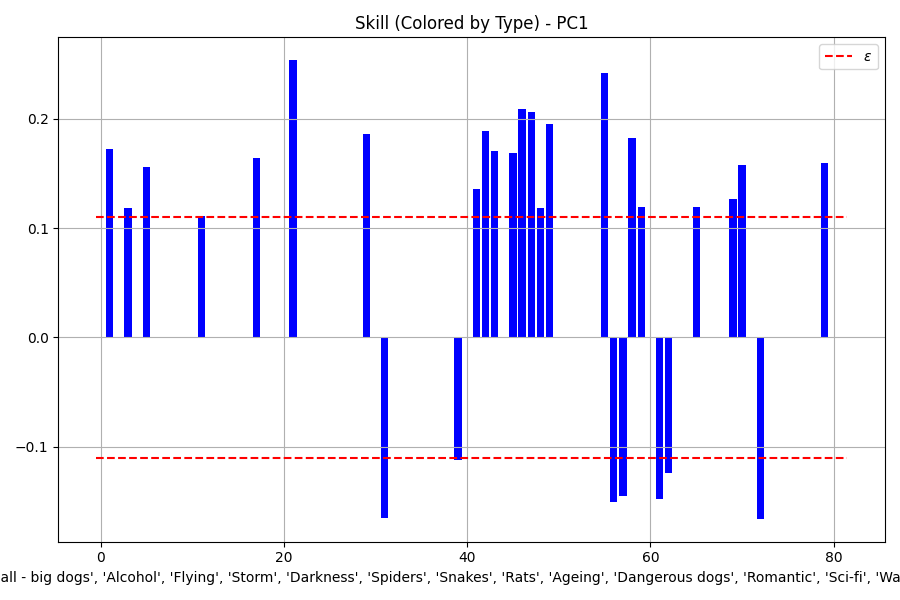

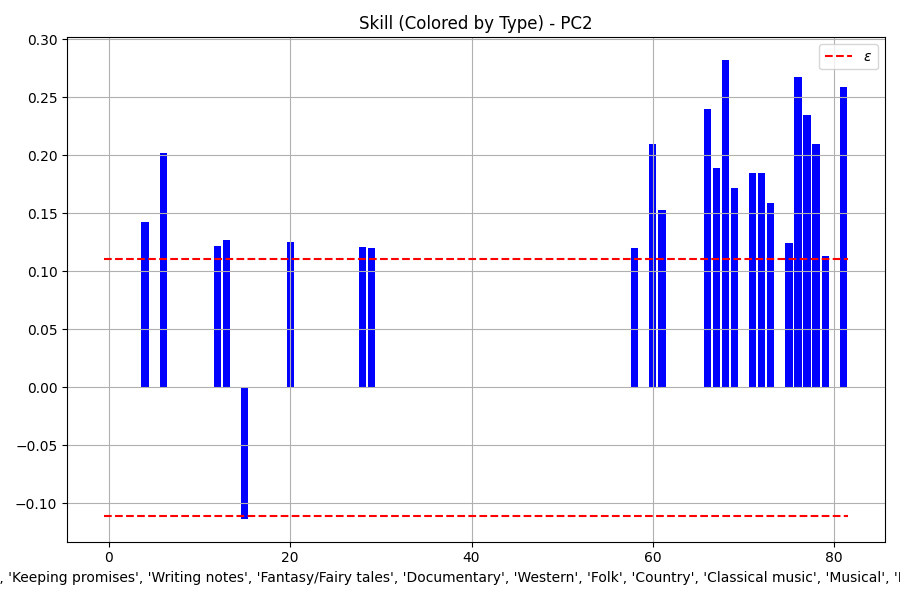

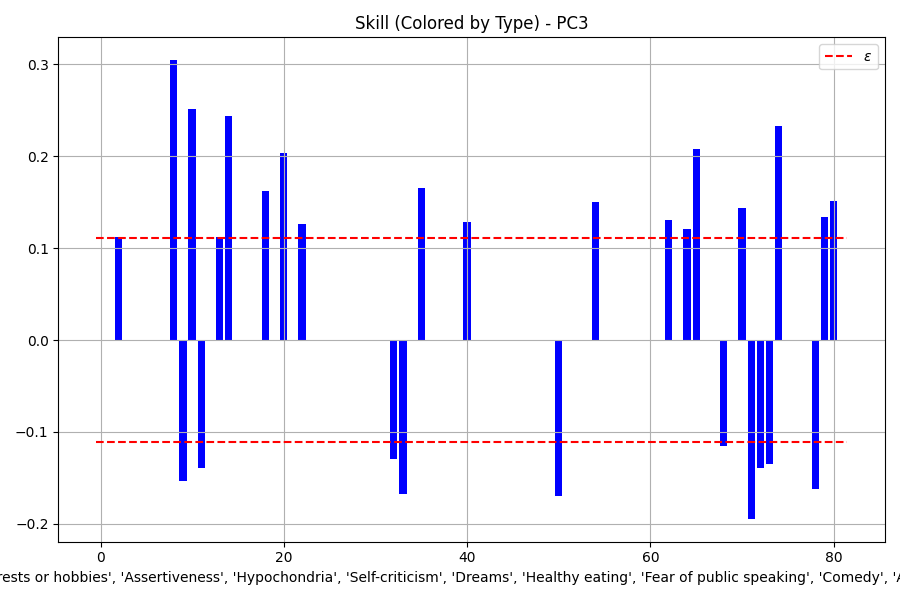

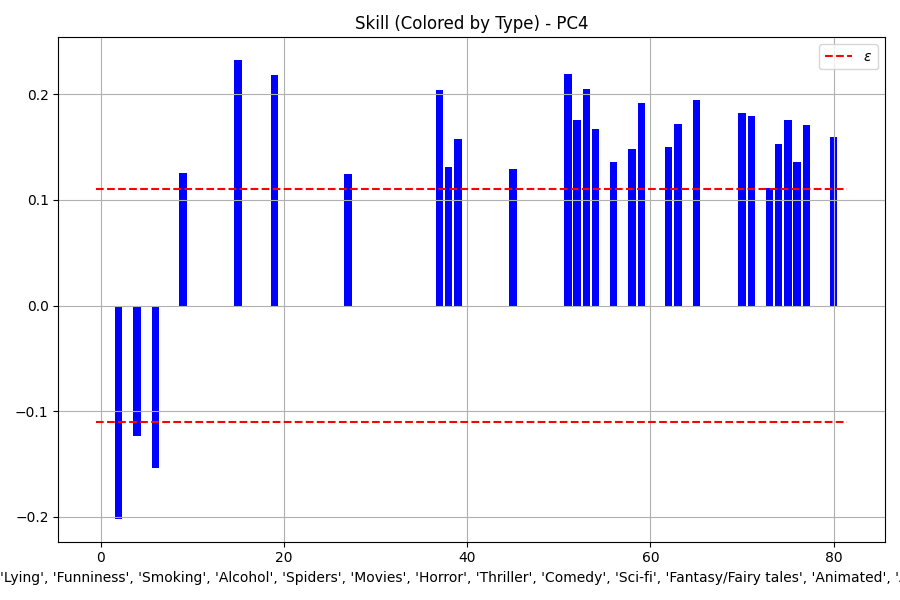

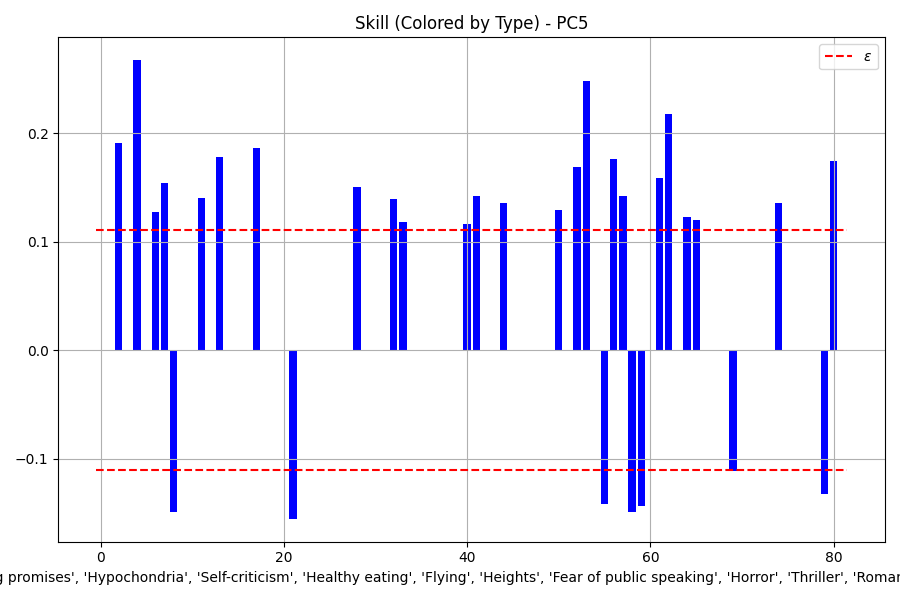

In [595]:
# Calcolo di epsilon
eps = np.sqrt(1 / pca.n_features_in_)

# Lista delle colonne
cols = Xstd_df.columns.to_list()

# Ciclo per ogni componente principale
for ii in range(m):
    # Indici di componenti maggiori o uguali a epsilon (positivo e negativo)
    ind_great_pos_PCii = np.where(pca.components_[ii, :] >= eps)[0]
    ind_great_neg_PCii = np.where(pca.components_[ii, :] <= -eps)[0]
    ind_significant = np.union1d(ind_great_pos_PCii, ind_great_neg_PCii)  # Unione degli indici

    # Estrarre i label significativi
    significant_labels = [cols[idx] for idx in ind_significant]
    significant_values = pca.components_[ii, ind_significant]

    # Creazione del barplot
    plt.figure(figsize=(9, 6))
    #tupl= sorted(zip(ind_significant, significant_values), reverse=True, key=lambda x: x[1]) 
    plt.bar(ind_significant, significant_values, color='blue')
    plt.plot([-0.5, len(cols) - 0.5], [eps, eps], "red", linestyle="--", label=r"$\epsilon$")
    plt.plot([-0.5, len(cols) - 0.5], [-eps, -eps], "red", linestyle="--")
    plt.xlabel(significant_labels)
    plt.title(f"Skill (Colored by Type) - PC{ii + 1}")
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.show()


In [596]:
# DEFINE EPSILON
eps = np.sqrt(1/pca.n_features_in_)  # <-- TODO!!

# DEFINE THE LIST OF SKILL COLORS W.R.T. THE SKILL TYPES AND THE SKILL CATEGORIES
skill_colors_type = [skill_types_df.loc[skill_types_df["skill"]== s]["color"].values[0] for s in skill_cols]  # <-- TODO!!
skill_colors_cat =  [skill_cats_df.loc[skill_cats_df["skill"]== s]["color"].values[0] for s in skill_cols]  # <-- TODO!!

# MAKE A CUSTOM LEGEND
type_colors_legend = [Line2D([0], [0], color=type_colors[k]) for k in type_colors.keys()]
cat_colors_legend = [Line2D([0], [0], color=cat_colors[k]) for k in cat_colors.keys()]

# FOR-CYCLE TO GENERALIZE THE PLOT COMMANDS
for ii in range(m):
    # MAKE THE BARPLOT WITH SKILL TYPE COLORS
    plt.figure(figsize=(12,6))  #<-- TODO!!
    plt.bar(np.arange(pca.n_features_in_), pca.components_[ii,:], color=skill_colors_type)
    plt.plot([-0.5, pca.n_features_in_+0.5], [eps, eps], "red")
    plt.plot([-0.5, pca.n_features_in_+0.5], [-eps, -eps], "red")
    plt.xticks(ticks=np.arange(pca.n_features_in_),
               labels=skill_cols,
               rotation=90)
    plt.title(f"SKILL (COLORED BY TYPE) - PC{ii+1}")
    plt.legend(type_colors_legend, [k for k in type_colors.keys()])
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # MAKE THE BARPLOT WITH SKILL CATEGORY COLORS
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(pca.n_features_in_), pca.components_[ii,:], color=skill_colors_cat)
    plt.plot([-0.5, pca.n_features_in_+0.5], [eps, eps], "red")
    plt.plot([-0.5, pca.n_features_in_+0.5], [-eps, -eps], "red")
    plt.xticks(ticks=np.arange(pca.n_features_in_),
               labels=skill_cols,
               rotation=90)
    plt.title(f"SKILL (COLORED BY CATEGORY) - PC{ii+1}")
    plt.legend(cat_colors_legend, [k for k in cat_colors.keys()])
    plt.grid()
    plt.tight_layout()
    plt.show() #<-- TODO!!
    plt.show()
    
    # THE SELECTION OF THE SKILLS WITH CONTRIBUTE GREATER THAN THE THRESHOLD
    ind_great_pos_PCii= np.argwhere(pca.components_[ii,:]>=eps).flatten() #<-- TODO!!
    ind_great_neg_PCii= np.argwhere(pca.components_[ii,:]<eps).flatten() #<-- TODO!!
    
    great_pos_PCii= [skill_cols[i] for i in ind_great_pos_PCii]    
    great_neg_PCii= [skill_cols[i] for i in ind_great_neg_PCii]
        
    print('')
    print(f'****************** PC{ii+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')  # <-- TODO!!
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')  # <-- TODO!!
    print('*********************************************')
    print('')

NameError: name 'skill_cols' is not defined

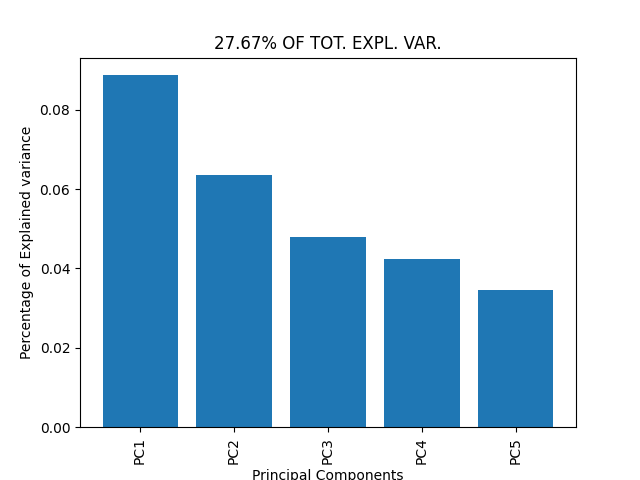

In [ ]:
m= min(5,num_components_mm)
pca = PCA(n_components=m)
pca.fit(Xmm_df)  
round_expl_var_ratio = np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)

plt.figure()
plt.bar(range(1,m+1), pca.explained_variance_ratio_)
plt.title(f"{round_expl_var_ratio}% OF TOT. EXPL. VAR.")
plt.xticks(ticks=np.arange(1,m+1), 
           labels=[f"PC{i}" for i in range(1,m+1)],
           rotation=90)
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Explained variance")
plt.show()

In [ ]:
# DEFINE EPSILON
eps = np.sqrt(1/pca.n_features_in_)  # <-- TODO!!

# DEFINE THE LIST OF SKILL COLORS W.R.T. THE SKILL TYPES AND THE SKILL CATEGORIES
skill_colors_type = [skill_types_df.loc[skill_types_df["skill"]== s]["color"].values[0] for s in skill_cols]  # <-- TODO!!
skill_colors_cat =  [skill_cats_df.loc[skill_cats_df["skill"]== s]["color"].values[0] for s in skill_cols]  # <-- TODO!!

# MAKE A CUSTOM LEGEND
type_colors_legend = [Line2D([0], [0], color=type_colors[k]) for k in type_colors.keys()]
cat_colors_legend = [Line2D([0], [0], color=cat_colors[k]) for k in cat_colors.keys()]

# FOR-CYCLE TO GENERALIZE THE PLOT COMMANDS
for ii in range(m):
    # MAKE THE BARPLOT WITH SKILL TYPE COLORS
    plt.figure(figsize=(12,6))  #<-- TODO!!
    plt.bar(np.arange(pca.n_features_in_), pca.components_[ii,:], color=skill_colors_type)
    plt.plot([-0.5, pca.n_features_in_+0.5], [eps, eps], "red")
    plt.plot([-0.5, pca.n_features_in_+0.5], [-eps, -eps], "red")
    plt.xticks(ticks=np.arange(pca.n_features_in_),
               labels=skill_cols,
               rotation=90)
    plt.title(f"SKILL (COLORED BY TYPE) - PC{ii+1}")
    plt.legend(type_colors_legend, [k for k in type_colors.keys()])
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # MAKE THE BARPLOT WITH SKILL CATEGORY COLORS
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(pca.n_features_in_), pca.components_[ii,:], color=skill_colors_cat)
    plt.plot([-0.5, pca.n_features_in_+0.5], [eps, eps], "red")
    plt.plot([-0.5, pca.n_features_in_+0.5], [-eps, -eps], "red")
    plt.xticks(ticks=np.arange(pca.n_features_in_),
               labels=skill_cols,
               rotation=90)
    plt.title(f"SKILL (COLORED BY CATEGORY) - PC{ii+1}")
    plt.legend(cat_colors_legend, [k for k in cat_colors.keys()])
    plt.grid()
    plt.tight_layout()
    plt.show() #<-- TODO!!
    plt.show()
    
    # THE SELECTION OF THE SKILLS WITH CONTRIBUTE GREATER THAN THE THRESHOLD
    ind_great_pos_PCii= np.argwhere(pca.components_[ii,:]>=eps).flatten() #<-- TODO!!
    ind_great_neg_PCii= np.argwhere(pca.components_[ii,:]<eps).flatten() #<-- TODO!!
    
    great_pos_PCii= [skill_cols[i] for i in ind_great_pos_PCii]    
    great_neg_PCii= [skill_cols[i] for i in ind_great_neg_PCii]
        
    print('')
    print(f'****************** PC{ii+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')  # <-- TODO!!
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')  # <-- TODO!!
    print('*********************************************')
    print('')

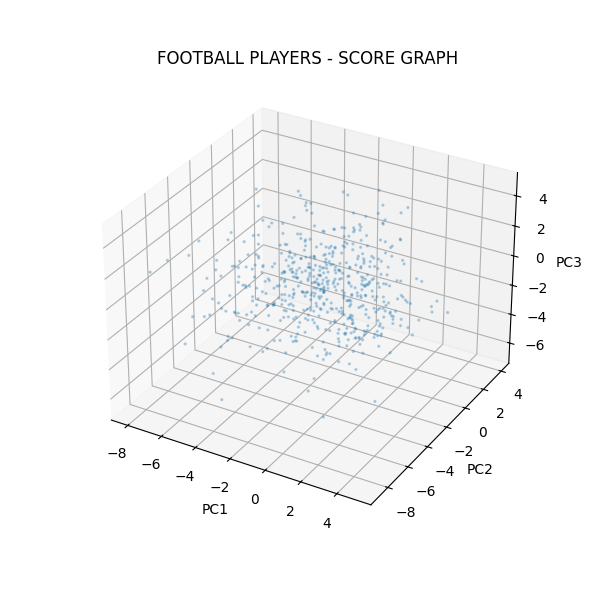

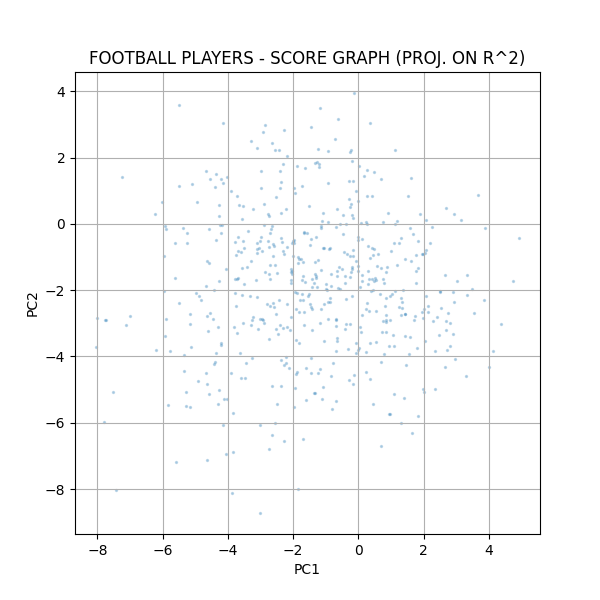

In [ ]:
# # SAVE THE COLORS OF Set1 AS A LIST OF 3-TUPLES "(red_value, green_value, blue_value)"
# set1 = cm.Set1.colors

# ######### SHOWING THE COLORS OF THE CHOSEN COLORMAP #########
# display(cm.Set1)
# #############################################################

# # EXTRACT THE GENERAL POSITIONS FROM THE DATASET
# # genpos = myfifa_df['GeneralPosition'].unique()

# # VISUALIZE THE GENERAL POSITIONS
# print('')
# print('*************************')
# print(f'GENERAL POSITIONS: {list(genpos)}')
# print('*************************')
# print('')

# # DICTIONARY OF THE TYPE {general_pos: color}
# genpos_colors = {genpos[i]:set1[i] for i in range(len(genpos))}  # <-- TODO!!

# # ADDING THE 'color' COLUMN
# myfifa_df['color'] = [genpos_colors[t] for t in myfifa_df["GeneralPosition"].values]  # <-- TODO!!

# -------------------------------------------------------------

# COMPUTE THE DATA TRANSFORMATION INTO THE PC-SPACE
Ystd_df = pca.transform(Xstd_df)  # <-- TODO!!

# MAKE A CUSTOM LEGEND FOR COLORS
# genpos_colors_legend = [Line2D([0], [0], color=genpos_colors[k]) for k in genpos_colors.keys()]

# MAKE THE 3D SCORE GRAPH
sg_3d = plt.figure(figsize=(6, 6))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ystd_df[:,0], Ystd_df[:,1], Ystd_df[:,2], s=2, alpha=0.25)  # <-- TODO!!
plt.title('FOOTBALL PLAYERS - SCORE GRAPH')
ax_sg_3d.set_xlabel("PC1")
ax_sg_3d.set_ylabel("PC2")
ax_sg_3d.set_zlabel("PC3")
# plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(6, 6)) # <-- TODO!!
plt.scatter(Ystd_df[:,0], Ystd_df[:,1], s=2, alpha=0.25)
plt.title("FOOTBALL PLAYERS - SCORE GRAPH (PROJ. ON R^2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

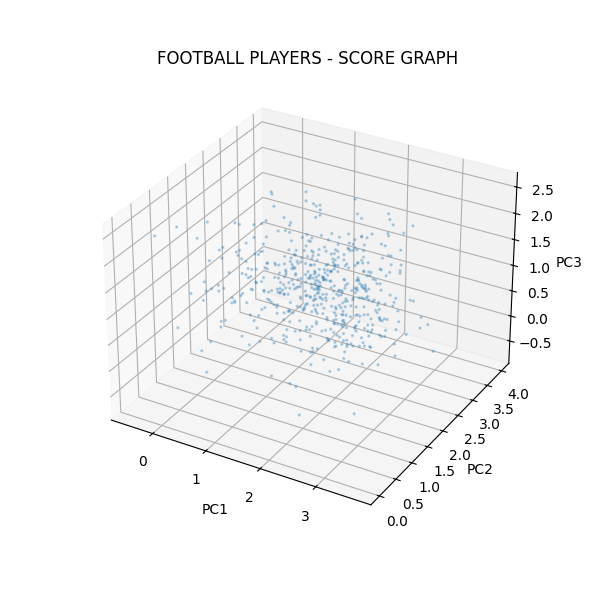

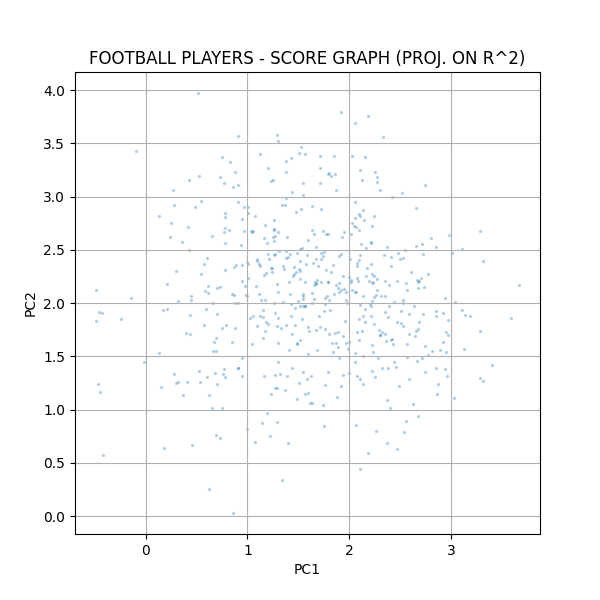

In [ ]:
# # SAVE THE COLORS OF Set1 AS A LIST OF 3-TUPLES "(red_value, green_value, blue_value)"
# set1 = cm.Set1.colors

# ######### SHOWING THE COLORS OF THE CHOSEN COLORMAP #########
# display(cm.Set1)
# #############################################################

# # EXTRACT THE GENERAL POSITIONS FROM THE DATASET
# # genpos = myfifa_df['GeneralPosition'].unique()

# # VISUALIZE THE GENERAL POSITIONS
# print('')
# print('*************************')
# print(f'GENERAL POSITIONS: {list(genpos)}')
# print('*************************')
# print('')

# # DICTIONARY OF THE TYPE {general_pos: color}
# genpos_colors = {genpos[i]:set1[i] for i in range(len(genpos))}  # <-- TODO!!

# # ADDING THE 'color' COLUMN
# myfifa_df['color'] = [genpos_colors[t] for t in myfifa_df["GeneralPosition"].values]  # <-- TODO!!

# -------------------------------------------------------------

# COMPUTE THE DATA TRANSFORMATION INTO THE PC-SPACE
Ymm_df = pca.transform(Xmm_df)  # <-- TODO!!

# MAKE A CUSTOM LEGEND FOR COLORS
# genpos_colors_legend = [Line2D([0], [0], color=genpos_colors[k]) for k in genpos_colors.keys()]

# MAKE THE 3D SCORE GRAPH
sg_3d = plt.figure(figsize=(6, 6))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ymm_df[:,0], Ymm_df[:,1], Ymm_df[:,2], s=2, alpha=0.25)  # <-- TODO!!
plt.title('FOOTBALL PLAYERS - SCORE GRAPH')
ax_sg_3d.set_xlabel("PC1")
ax_sg_3d.set_ylabel("PC2")
ax_sg_3d.set_zlabel("PC3")
# plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(6, 6)) # <-- TODO!!
plt.scatter(Ymm_df[:,0], Ymm_df[:,1], s=2, alpha=0.25)
plt.title("FOOTBALL PLAYERS - SCORE GRAPH (PROJ. ON R^2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

In [598]:
# INITIALIZE SOME LISTS TO STORE THE TEMPORARY RESULTS AND, THEN, MAKE COMPARISONS
km_list = []
silcoeff_list = []
k_list = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list)):
    print(f'****************** START k-MEANS WITH k={k_list[i]} ******************')
    print('Computing...')
    km_list.append(KMeans(n_clusters=k_list[i], n_init=3, random_state=random_seed))  # <-- TODO!!
    km = km_list[i]
    km.fit(Ystd_df) # <-- TODO!!
    silcoeff_list.append(silhouette_score(Ystd_df, km.labels_))  # <-- TODO!!
    print(f'****************** END k-MEANS WITH k={k_list[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best = np.argmax(silcoeff_list)  # <-- TODO!!
k = k_list[i_best]
km = km_list[i_best]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}')  # <-- TODO!!
print('**************************************************************')

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


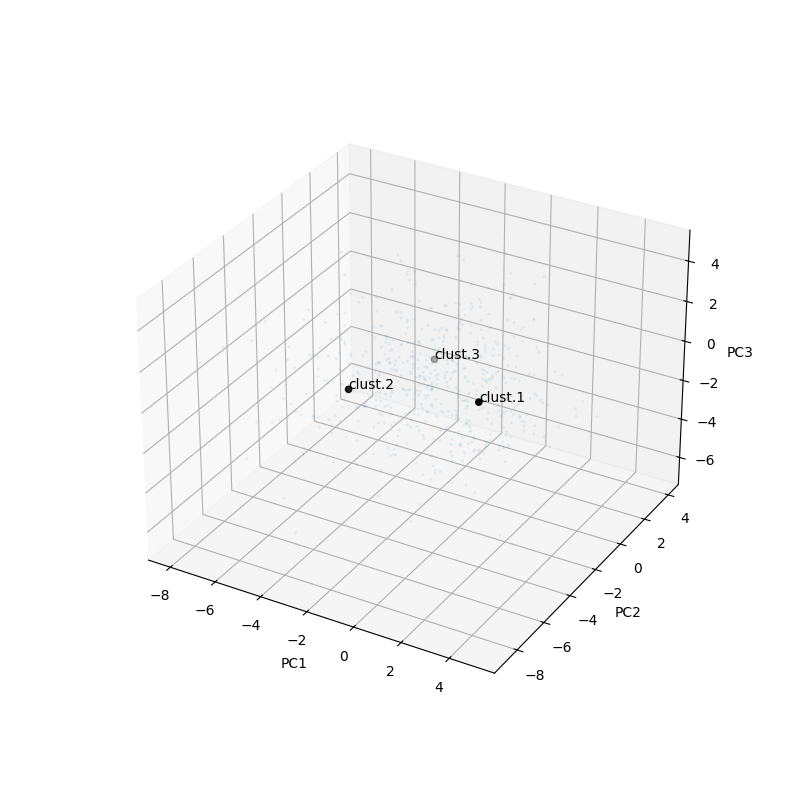

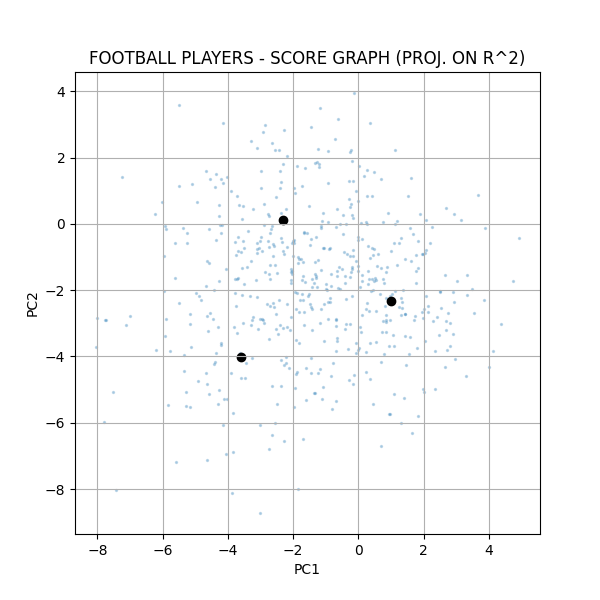

In [601]:
# MAKE THE 3D SCORE GRAPH WITH THE CENTROIDS
sg_3d_km= plt.figure(figsize=(8,8)) #<-- TODO!!
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection="3d")
ax_sg_3d_km.scatter(Ystd_df[:,0],Ystd_df[:,1],Ystd_df[:,2], s=2, alpha=0.05)
ax_sg_3d_km.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c="black")

# CODE FOR WRITING CLUSTERS' INDICES IN THE PLOT
for kk in range(k):
    ax_sg_3d_km.text(km.cluster_centers_[kk, 0], km.cluster_centers_[kk, 1], km.cluster_centers_[kk, 2], f'clust.{kk + 1}')
ax_sg_3d_km.set_xlabel("PC1")#<-- TODO!!
ax_sg_3d_km.set_ylabel("PC2")
ax_sg_3d_km.set_zlabel("PC3")
# plt.legend(genpos_colors_legend, [k for k in genpos_colors_legend])
plt.grid()
plt.show()


# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(6, 6)) # <-- TODO!!
plt.scatter(Ystd_df[:,0], Ystd_df[:,1], s=2, alpha=0.25)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="black")
plt.title("FOOTBALL PLAYERS - SCORE GRAPH (PROJ. ON R^2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

In [604]:
# INITIALIZE SOME LISTS TO STORE THE TEMPORARY RESULTS AND, THEN, MAKE COMPARISONS
km_list = []
silcoeff_list = []
k_list = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list)):
    print(f'****************** START k-MEANS WITH k={k_list[i]} ******************')
    print('Computing...')
    km_list.append(KMeans(n_clusters=k_list[i], n_init=3, random_state=random_seed))  # <-- TODO!!
    km = km_list[i]
    km.fit(Ymm_df) # <-- TODO!!
    silcoeff_list.append(silhouette_score(Ymm_df, km.labels_))  # <-- TODO!!
    print(f'****************** END k-MEANS WITH k={k_list[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best = np.argmax(silcoeff_list)  # <-- TODO!!
k = k_list[i_best]
km = km_list[i_best]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}')  # <-- TODO!!
print('**************************************************************')

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


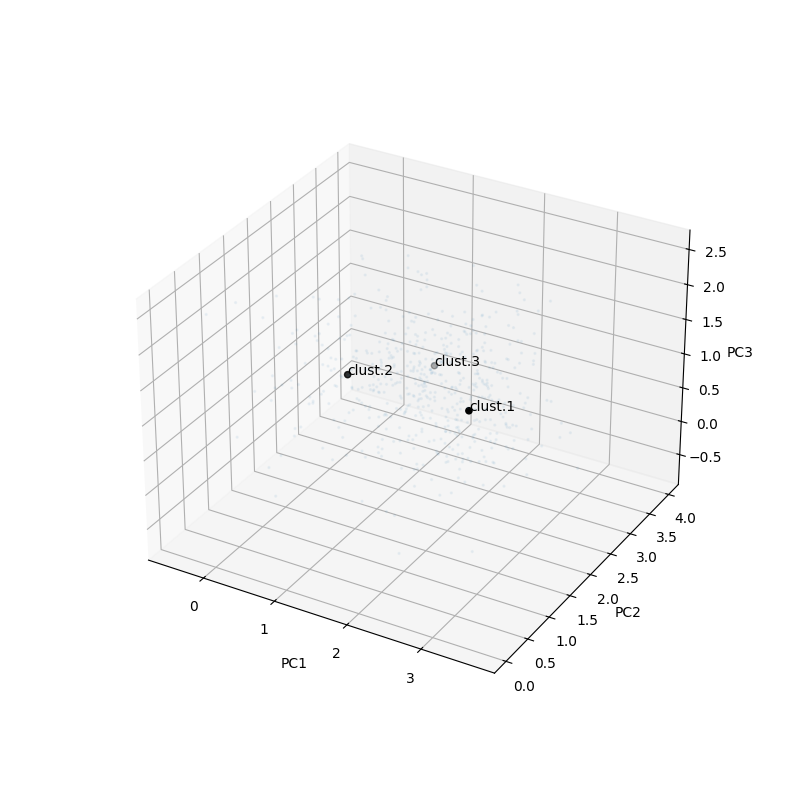

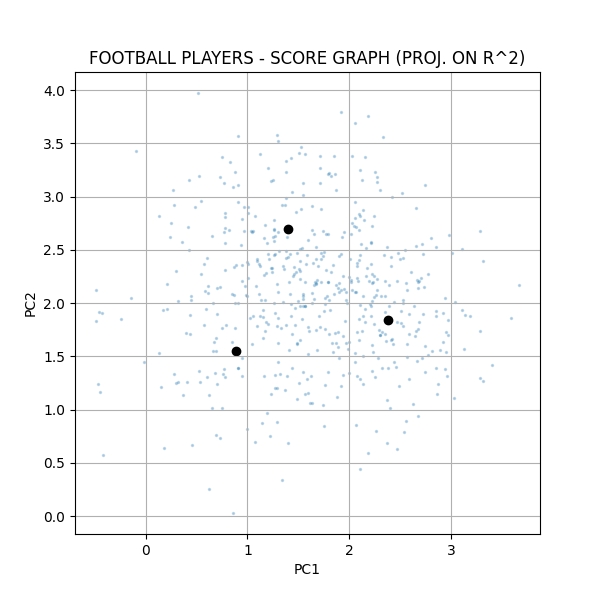

In [605]:
# MAKE THE 3D SCORE GRAPH WITH THE CENTROIDS
sg_3d_km= plt.figure(figsize=(8,8)) #<-- TODO!!
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection="3d")
ax_sg_3d_km.scatter(Ymm_df[:,0],Ymm_df[:,1],Ymm_df[:,2], s=2, alpha=0.05)
ax_sg_3d_km.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c="black")

# CODE FOR WRITING CLUSTERS' INDICES IN THE PLOT
for kk in range(k):
    ax_sg_3d_km.text(km.cluster_centers_[kk, 0], km.cluster_centers_[kk, 1], km.cluster_centers_[kk, 2], f'clust.{kk + 1}')
ax_sg_3d_km.set_xlabel("PC1")#<-- TODO!!
ax_sg_3d_km.set_ylabel("PC2")
ax_sg_3d_km.set_zlabel("PC3")
# plt.legend(genpos_colors_legend, [k for k in genpos_colors_legend])
plt.grid()
plt.show()


# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(6, 6)) # <-- TODO!!
plt.scatter(Ymm_df[:,0], Ymm_df[:,1], s=2, alpha=0.25)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="black")
plt.title("FOOTBALL PLAYERS - SCORE GRAPH (PROJ. ON R^2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

In [ ]:
# mask_clusters = [km.labels_ == ii for ii in range(k)]# TODO: Write the full code!
# cluster_genpos = [dict(myfifa_df.loc[mask_clusters[ii], "GeneralPosition"].value_counts()) for ii in range(k)]

# bin_labels = ["GK", "DF", "MF", "FW"]
# maxcount= np.max([max(cluster_genpos[kk].values()) for kk in range(k)])


# fig_centroids_ext, ax_centroids_ext = plt.subplots(2,2,figsize=(10,10))
# for ii in range(k):
#     ir=ii//2
#     ic=ii%2
#     ax_centroids_ext[ir,ic].bar(bin_labels, [cluster_genpos[ii].get(bb,0) for bb in bin_labels])
#     ax_centroids_ext[ir,ic].set_ylim(0, maxcount)
#     ax_centroids_ext[ir,ic].grid(visible=True, which= "both")
#     plt.tight_layout()
#     ax_centroids_ext[ir,ic].set_title(f"Cluster {ii+1}-{cluster_names[ii]}")

In [ ]:
# silcores= silhouette_samples(Yfifa, km.labels_)# TODO: Write the full code!
# cluster_silscores = [np.mean(silcores[km.labels_ == kk]) for kk in range(k)]

# display(pd.DataFrame(np.array(cluster_silscores+[np.max(silcoeff_list)]), index= cluster_names + ["Global"], columns=["Sil.Score"]))